# Stock trend prediction

### *Import library*

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential,load_model
from keras.layers import LSTM,Dense,Dropout

### Stock data from yahoo finance

In [15]:
from pandas_datareader import data

stock=data.DataReader('GOOG', 'yahoo', '1999-06-01', '2016-06-13')
stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [16]:
stock.shape

(2975, 6)

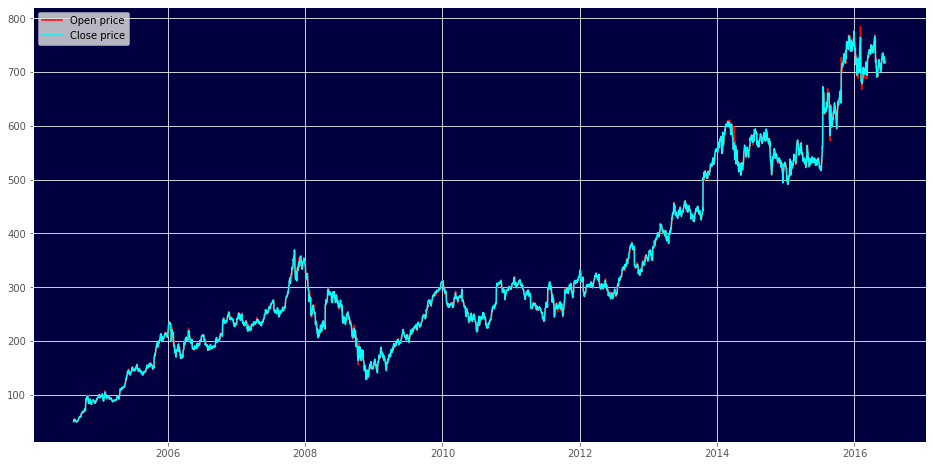

In [91]:
fig,ax=plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(stock['Open'],color='red',label='Open price')
plt.plot(stock['Close'],color='cyan',label='Close price')
plt.legend()
plt.show()

In [23]:
# stock=stock['Open']
stock=stock.reshape(-1,1)
stock

array([[ 49.81328964],
       [ 50.31640244],
       [ 55.16821671],
       ...,
       [722.86999512],
       [719.4699707 ],
       [716.51000977]])

### Split training data and testing data

In [25]:
train_data=np.array(stock[:int(stock.shape[0]*0.8)])
test_data=np.array(stock[int(stock.shape[0]*0.8):])

### Scale data 0 and 1

In [27]:
scaler=MinMaxScaler(feature_range=(0,1))
train_data=scaler.fit_transform(train_data)
test_data=scaler.transform(test_data)

### create a function to create dataset

In [28]:
def dataset(stock):
    x=[]
    y=[]
    for i in range(50,stock.shape[0]):
        x.append(stock[i-50:i,0])
        y.append(stock[i,0])
    x=np.array(x)
    y=np.array(y)
    return x,y

### create training and testing data by call our dataset function

In [29]:
x_train,y_train=dataset(train_data)
x_test,y_test=dataset(test_data)

#### we need to reshape our data using LSTM layers(Long short term model)

In [31]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

### Create the Model

In [37]:
model=Sequential()
model.add(LSTM(units=96,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

### Reshape feature for LSTM layers

In [38]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

### Compile our Model

In [39]:
model.compile(loss='mean_squared_error',optimizer='adam')

#### save our Model and start the training

In [41]:
model.fit(x_train,y_train,epochs=50,batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/50
73/73 [==============================] - 24s 196ms/step - loss: 0.0115
Epoch 2/50
73/73 [==============================] - 15s 208ms/step - loss: 0.0024
Epoch 3/50
73/73 [==============================] - 16s 226ms/step - loss: 0.0020
Epoch 4/50
73/73 [==============================] - 17s 227ms/step - loss: 0.0023
Epoch 5/50
73/73 [==============================] - 17s 227ms/step - loss: 0.0019
Epoch 6/50
73/73 [==============================] - 17s 227ms/step - loss: 0.0017
Epoch 7/50
73/73 [==============================] - 15s 209ms/step - loss: 0.0015
Epoch 8/50
73/73 [==============================] - 14s 197ms/step - loss: 0.0015
Epoch 9/50
73/73 [==============================] - 14s 196ms/step - loss: 0.0015
Epoch 10/50
73/73 [==============================] - 14s 196ms/step - loss: 0.0015
Epoch 11/50
73/73 [==============================] - 16s 226ms/step - loss: 0.0013
Epoch 12/50
73/73 [==============================] - 17s 231ms/step - loss: 0.0014
Epoch 13/50
7

### now load the model


In [43]:
model=load_model('stock_prediction.h5')

### visualize our predicted data

In [47]:
prediction=model.predict(x_test)
prediction=scaler.inverse_transform(prediction)
y_test_scale=scaler.inverse_transform(y_test.reshape(-1,1))

18/18 [==============================] - 1s 72ms/step


### Result

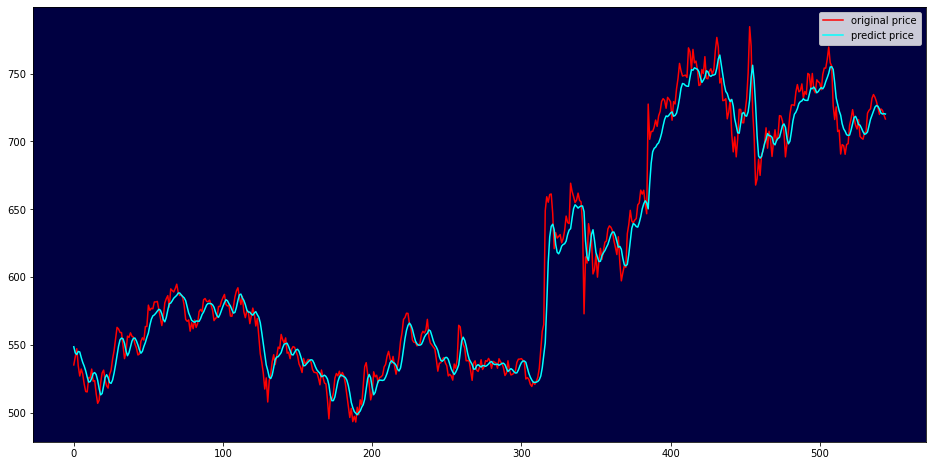

In [55]:
fig,ax=plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scale,color='red',label='original price')
plt.plot(prediction,color='cyan',label='predict price')
plt.legend()
plt.show()

In [ ]:
import finplot as fplt
import yfinance

symbol = 'GOOG'
df = yfinance.download(symbol)

ax = fplt.create_plot(symbol)

fplt.candlestick_ochl(df[['Open', 'Close', 'High', 'Low']], ax=ax)
fplt.plot(df['Close'].rolling(200).mean(), ax=ax, legend='SMA 200')
fplt.plot(df['Close'].rolling(50).mean(), ax=ax, legend='SMA 50')
fplt.plot(df['Close'].rolling(20).mean(), ax=ax, legend='SMA 20')

fplt.volume_ocv(df[['Open', 'Close', 'Volume']], ax=ax.overlay())
fplt.show()